In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

In [2]:
df_test=pdr.get_data_yahoo('^RUA','2018-01-01','2021-01-01')
training_data=pdr.get_data_yahoo('^RUA','2004-01-01','2016-01-01')

In [3]:
def getPriceFit(stock_list):
    df=pd.DataFrame()
    for i in stock_list:
        data=pdr.get_data_yahoo(i,'2010-01-01','2020-01-01')
        df[i]=data['Adj Close']
    return df

In [47]:
def getPriceTest(stock_list):
    df=pd.DataFrame()
    for i in stock_list:
        data=pdr.get_data_yahoo(i,'2020-01-01','2022-01-01')
        df[i]=data['Adj Close']
    return df

In [4]:
def getReturns(df):
    return df.pct_change()

In [5]:
def maxCorr(df):
    rets=df.pct_change()
    t=rets.corr().abs()
    maxT=0
    maxT1=''
    maxT2=''
    for i in t.columns:
        for j in t.index:
            if i!=j:
                if t[i][j]>maxT:
                    maxT=t[i][j]
                    maxT1=i
                    maxT2=j
    return maxT1,maxT2

In [30]:
def pairTradeFit(s1,s2):
    data=getPriceFit(list([s1,s2]))
    pos=100000
    stock=[pos/data.iloc[0][s1],pos/data.iloc[0][s2]]
    data['portfolio']=data[s1]*stock[0]+data[s2]*-stock[1]
    #plt.plot(data['portfolio'])
    #plt.show()
    return data['portfolio'].iloc[-1]

In [31]:
def pairTradeTest(s1,s2):
    data=getPriceTest(list([s1,s2]))
    pos=100000
    stock=[pos/data.iloc[0][s1],pos/data.iloc[0][s2]]
    data['portfolio']=data[s1]*stock[0]+data[s2]*-stock[1]
    #plt.plot(data['portfolio'])
    #plt.show()
    return data['portfolio'].iloc[-1]

In [13]:
stock_list=['HDFCBANK.NS','INDUSINDBK.NS','DCBBANK.NS','ICICIBANK.NS','SBIN.NS']
data=getPriceFit(stock_list)
s1,s2=maxCorr(data)

In [43]:
def test_portfolio(stock_list):
    train_data=pd.DataFrame(columns=stock_list)
    test_data=pd.DataFrame(columns=stock_list)
    for i in stock_list:
        train=[]
        test=[]
        for j in stock_list:
            train.append(pairTradeFit(i,j))
            test.append(pairTradeTest(i,j))
        train_data[i]=train
        test_data[i]=test
    train_data['stocks']=stock_list
    test_data['stocks']=stock_list
    train_data=train_data.set_index('stocks')
    test_data=test_data.set_index('stocks')  
    return train_data,test_data

In [44]:
train,test=test_portfolio(stock_list)

In [46]:
#select stock DCB for Short

,HDFCBANK.NS,INDUSINDBK.NS,DCBBANK.NS,ICICIBANK.NS,SBIN.NS
stocks,,,,,
HDFCBANK.NS,0.000000,-44158.169820,-61616.156421,29541.061466,42035.935606
INDUSINDBK.NS,44158.169820,0.000000,-17457.986600,73699.231286,86194.105426
DCBBANK.NS,61616.156421,17457.986600,0.000000,91157.217887,103652.092027
ICICIBANK.NS,-29541.061466,-73699.231286,-91157.217887,0.000000,12494.874140
SBIN.NS,-42035.935606,-86194.105426,-103652.092027,-12494.874140,0.000000


In [82]:
df=getPriceTest(list(['HDFCBANK.NS','DCBBANK.NS']))

In [86]:
s1='HDFCBANK.NS'
s2='DCBBANK.NS'

In [88]:
amt=[100000/df.iloc[0][s1],100000/df.iloc[0][s2]]

In [91]:
df['portfolio']=df[s1]*amt[0]+df[s2]*-amt[1]

In [93]:
df

,HDFCBANK.NS,DCBBANK.NS,portfolio
Date,,,
2020-01-01,1273.090088,176.300003,1.455192e-11
2020-01-02,1281.204956,183.300003,-3.333090e+03
2020-01-03,1262.934082,182.500000,-4.314476e+03
2020-01-06,1235.602295,182.949997,-6.716606e+03
2020-01-07,1255.167603,185.800003,-6.796336e+03
...,...,...,...
2021-12-27,1450.800049,78.800003,6.926241e+04
2021-12-28,1460.800049,79.449997,6.967921e+04
2021-12-29,1453.849976,79.300003,6.921837e+04


In [92]:
calc_sharpe(df)

480.0126969209228

In [97]:
def PairTradeMetrics(s1,s2):
    data=getPriceTest(list([s1,s2]))
    pos=100000
    stock=[pos/data.iloc[0][s1],pos/data.iloc[0][s2]]
    data['portfolio']=data[s1]*stock[0]+data[s2]*-stock[1]
    #sharpe_ratio=calc_sharpe(data)
    #MDD=max_drawdown(data)
    plt.plot(data['portfolio'])
    plt.title(s1)
    plt.show()

In [66]:
def max_drawdown(df):
    peak=max(df['portfolio'])+100000
    trough=min(df['portfolio'])+100000
    MDD=(trough-peak)/peak
    return MDD
  
    

In [60]:
def calc_sharpe(df):
    t=df['portfolio'].pct_change()
    sig=np.std(t)
    r=(df['portfolio'].iloc[-1]-df['portfolio'].iloc[0])/df['portfolio'].iloc[0]
    rf=0.0272
    SP=(r-rf)/sig
    return SP

In [62]:
sharpe=dict()
drawdowns=dict()

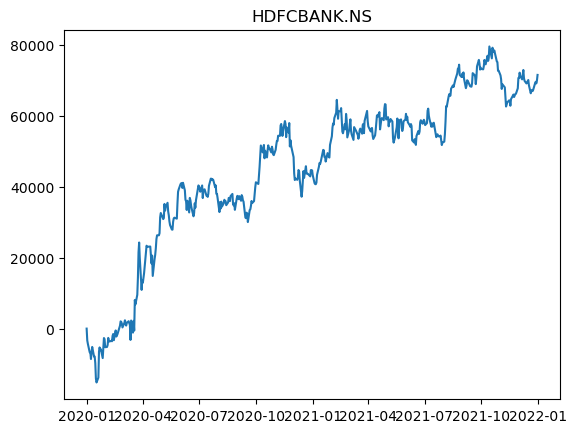

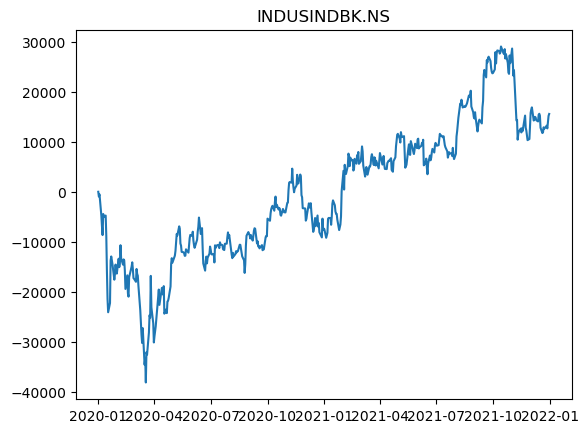

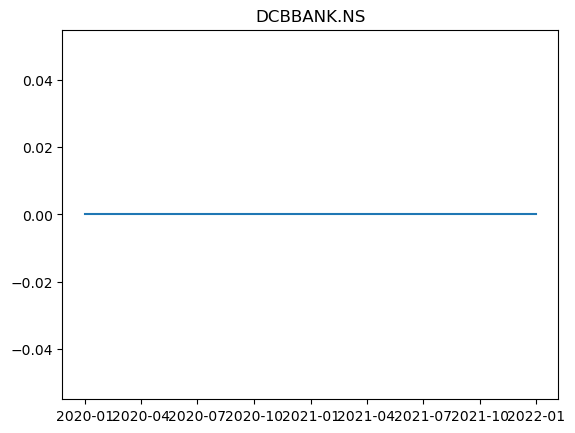

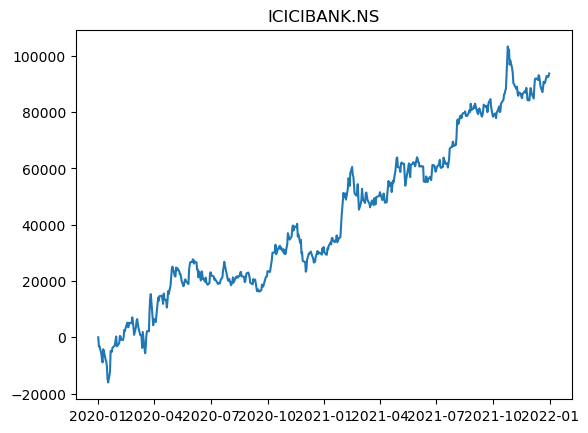

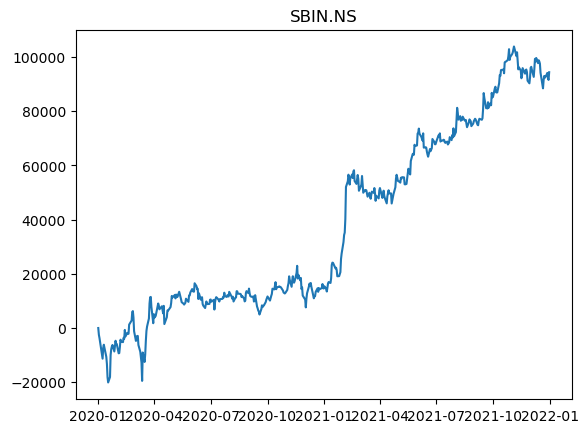

In [98]:
for i in stock_list:
    #SR,MDD= 
    PairTradeMetrics(i,"DCBBANK.NS")
    #sharpe[i]=SR
    #drawdowns[i]=MDD

In [80]:
PairTradeMetrics('HDFCBANK.NS','DCBBANK.NS')

(480.0126969209228, -0.5280189331318862)

In [68]:
sharpe

{'HDFCBANK.NS': 480.0126969209228,
 'INDUSINDBK.NS': 362.1750385087206,
 'DCBBANK.NS': nan,
 'ICICIBANK.NS': 643.4964373251026,
 'SBIN.NS': 836.339639150219}

In [39]:
test_data

,HDFCBANK.NS,INDUSINDBK.NS,DCBBANK.NS,ICICIBANK.NS,SBIN.NS
stocks,,,,,
HDFCBANK.NS,0.000000,-44158.169820,-61616.156421,29541.061466,42035.935606
INDUSINDBK.NS,44158.169820,0.000000,-17457.986600,73699.231286,86194.105426
DCBBANK.NS,61616.156421,17457.986600,0.000000,91157.217887,103652.092027
ICICIBANK.NS,-29541.061466,-73699.231286,-91157.217887,0.000000,12494.874140
SBIN.NS,-42035.935606,-86194.105426,-103652.092027,-12494.874140,0.000000


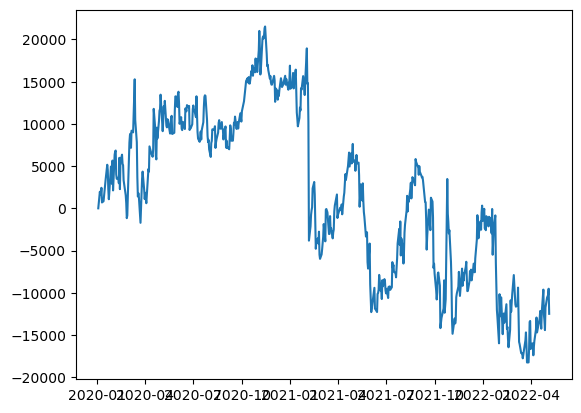

,ICICIBANK.NS,SBIN.NS,portfolio
Date,,,
2020-01-03,537.276794,330.647308,0.000000
2020-01-06,524.165222,316.081757,1964.786971
2020-01-07,521.373413,315.487244,1624.967594
2020-01-08,524.414490,316.874451,1771.441529
2020-01-09,544.705078,327.179321,2431.428219
...,...,...,...
2022-04-29,743.299988,496.299988,-11753.689274
2022-05-02,741.000000,491.000000,-10578.859019
2022-05-04,724.250000,479.649994,-10263.770229


In [19]:
pairTradeTest(s1,s2)

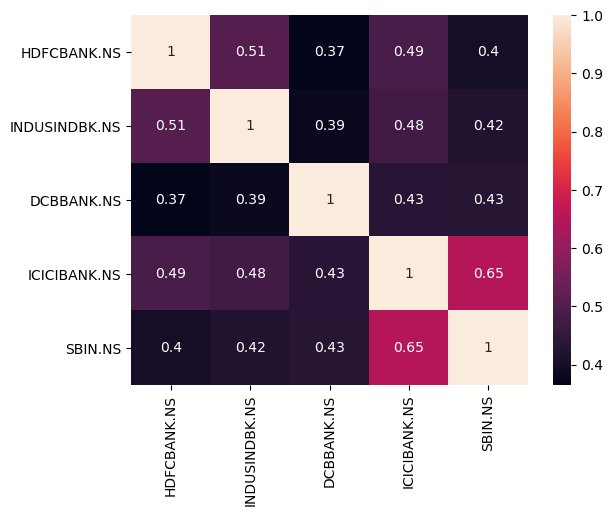

In [12]:
sns.heatmap(returns.corr().dropna(),annot=True)
plt.show()

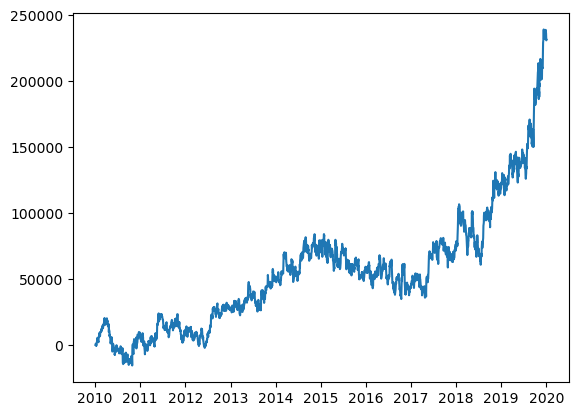

,ICICIBANK.NS,SBIN.NS,portfolio
Date,,,
2010-01-04,135.624344,202.633774,0.000000
2010-01-05,136.911667,202.708969,912.073866
2010-01-06,137.960037,203.925018,1084.947904
2010-01-07,136.657272,202.784134,687.407042
2010-01-08,134.737854,202.178314,-428.866412
...,...,...,...
2019-12-27,547.796082,334.164825,238996.173958
2019-12-30,542.361938,331.340881,236383.032794
2019-12-31,537.326721,330.696838,232988.248171


In [14]:
pairTradeFit(s1,s2)